In [22]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
rainy_counts = xr.concat([xr.open_dataarray(f'/Users/pedro/extreme_precipitation_in_gpm/data/wmp.{y}.raining_count.nc') for y in range(2015, 2021)], dim='time')
rainy_counts = rainy_counts.sum('time')
above_50_counts = xr.concat([xr.open_dataarray(f'/Users/pedro/extreme_precipitation_in_gpm/data/wmp.{y}.above_50_count.nc') for y in range(2015, 2021)], dim='time')
above_50_counts = above_50_counts.sum('time')

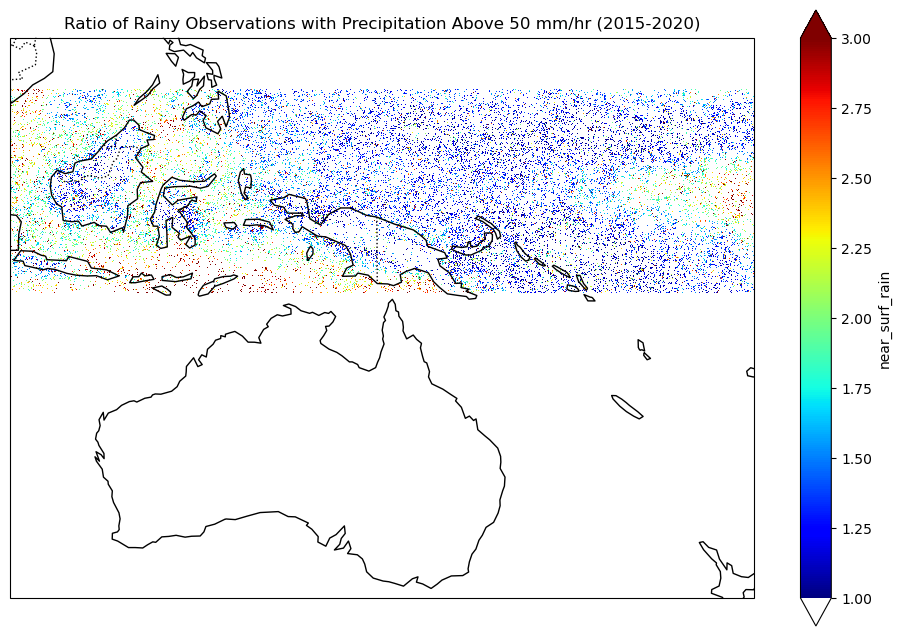

In [43]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ratio = 100*above_50_counts / rainy_counts
ratio = ratio.fillna(0)  # Replace NaNs resulting from division by zero with zero

cmap=plt.cm.jet.copy()
norm = colors.Normalize(vmin=1, vmax=3)
cmap.set_under('white')
ratio.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title("Ratio of Rainy Observations with Precipitation Above 50 mm/hr (2015-2020)")
ax.set_extent([105, 178, -40, 15], crs=ccrs.PlateCarree())# Show plot
plt.show()

In [44]:
mean_time = xr.open_dataarray(f'/Users/pedro/extreme_precipitation_in_gpm/data/wmp.2020.above_50_mean_solar_time.nc')

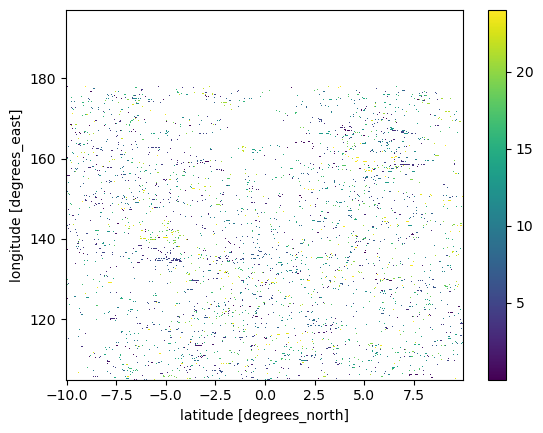

In [49]:
mean_time.plot()

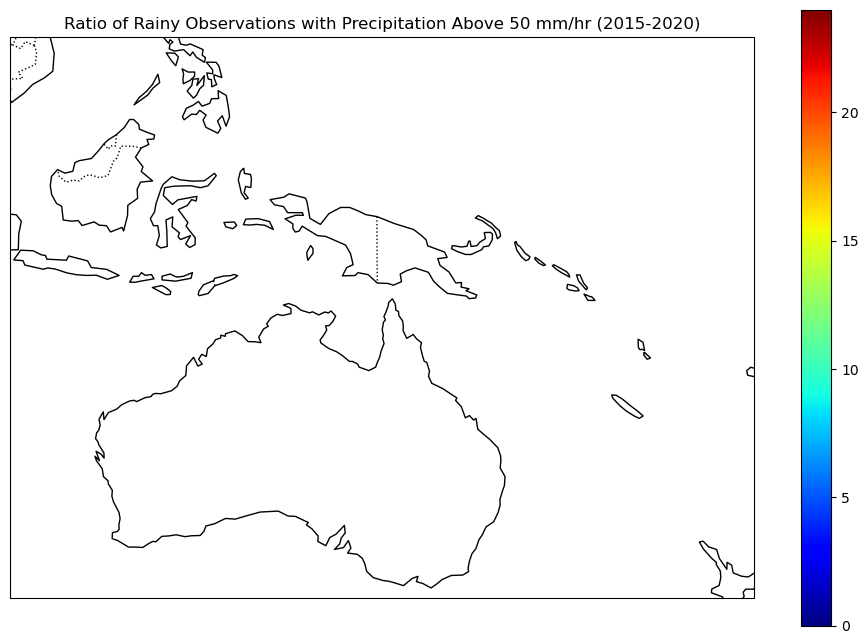

In [50]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ratio = mean_time
cmap=plt.cm.jet.copy()
norm = colors.Normalize(vmin=0, vmax=24)
mean_time.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title("Ratio of Rainy Observations with Precipitation Above 50 mm/hr (2015-2020)")
ax.set_extent([105, 178, -40, 15], crs=ccrs.PlateCarree())# Show plot
plt.show()